In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the dataset from drive
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.6 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
! [ -e /content ] && pip install -Uqq fastai

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from fastai.vision import *
path1 = '/content/drive/MyDrive/SpamSMSDetection/spam.csv'

In [6]:
# loading the dataset to Pandas Dataframe
spam_data = pd.read_csv('/content/drive/MyDrive/SpamSMSDetection/spam.csv', encoding='latin1')

In [7]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [8]:
spam_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
spam_data.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
spam_data.head()

,target,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [11]:
spam_data =  spam_data.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1)
spam_data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [12]:
spam_data.isnull().sum()

target    0
sms       0
dtype: int64

In [13]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
### Removing stopwords from the feature column.
sw = stopwords.words('english')

def stopword(text):
    if isinstance(text, str):
        txt = [word.lower() for word in text.split() if word.lower() not in sw]
        return txt
    else:
        return text  # Return the input as is if it's not a string

spam_data['sms'] = spam_data['sms'].apply(stopword)

spam_data.head()

,target,sms
0,ham,"[go, jurong, point,, crazy.., available, bugis, n, great, world, la, e, buffet..., cine, got, amore, wat...]"
1,ham,"[ok, lar..., joking, wif, u, oni...]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question(std, txt, rate)t&c's, apply, 08452810075over18's]"
3,ham,"[u, dun, say, early, hor..., u, c, already, say...]"
4,ham,"[nah, think, goes, usf,, lives, around, though]"


In [15]:
from nltk.stem.snowball import SnowballStemmer

ss = SnowballStemmer("english")

def stemming(text) :
    text = [ss.stem(word) for word in text if word.split()]
    return "".join(text)

spam_data['sms'] = spam_data['sms'].apply(stemming)
spam_data.head()

,target,sms
0,ham,"gojurongpoint,crazy..availbugingreatworldlaebuffet...cinegotamorwat..."
1,ham,oklar...jokewifuoni...
2,spam,freeentri2wklicompwinfacupfinaltkts21stmay2005.textfa87121receiventriquestion(stdtxtrate)t&cappli08452810075over18
3,ham,udunsayearlihor...ucalreadisay...
4,ham,"nahthinkgoeusf,livearoundthough"


<Axes: ylabel='target'>

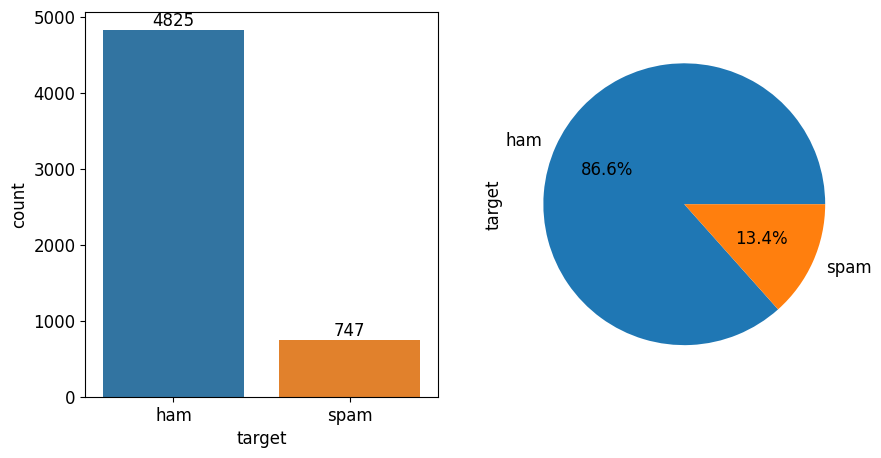

In [16]:
import seaborn as sns
_, ax = plt.subplots(1, 2, figsize=(10, 5))
plot1 = sns.countplot(spam_data, x='target', ax=ax[0])
# show count number above the bins
for container in plot1.containers:
    plot1.bar_label(container)

spam_data.target.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])

In [17]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
def preprocess_text(text):
    # lower text
    text = text.lower()

    # tokenization
    text = nltk.word_tokenize(text)

    # remove special characters
    text = [i for i in text if i.isalnum()]

    # remove stop words & punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return " ".join(text)

In [19]:
spam_data['text_transformed'] = spam_data['sms'].apply(preprocess_text)

In [20]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=1000, background_color='white', min_font_size=15)

In [21]:
wc_spam = wc.generate(spam_data[spam_data.target == 'spam']['text_transformed'].str.cat(sep=' '))

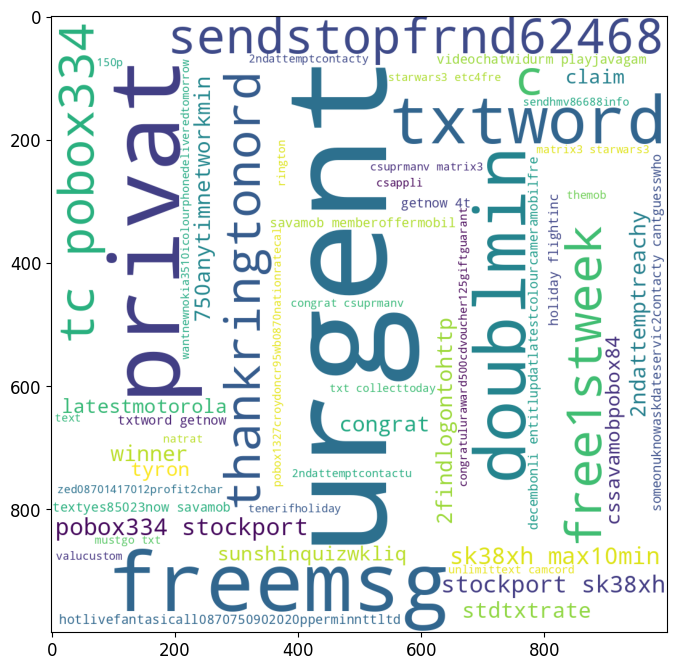

In [22]:
plt.figure(figsize=(8,8))
plt.imshow(wc_spam)

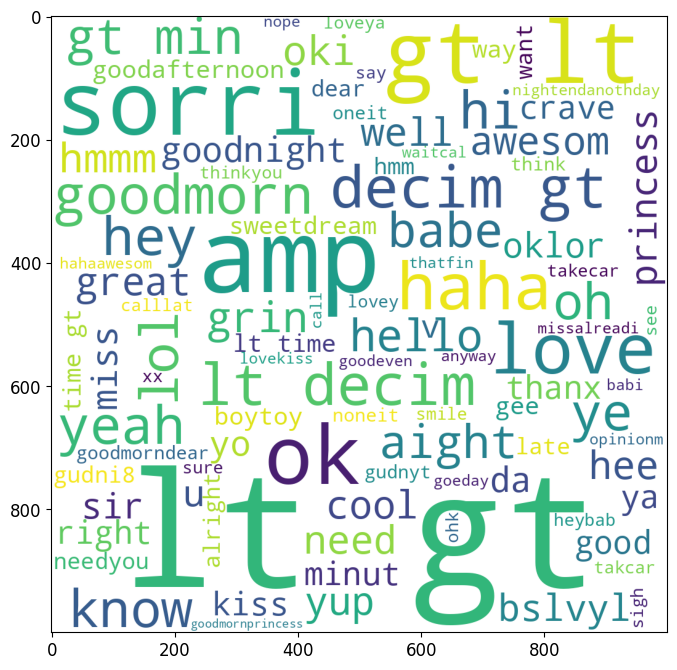

In [23]:
wc_ham = wc.generate(spam_data[spam_data.target == 'ham']['text_transformed'].str.cat(sep=' '))
plt.figure(figsize=(8,8))
plt.imshow(wc_ham)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [25]:
X = cv.fit_transform(spam_data['text_transformed']).toarray()
X.shape
y = spam_data['target'].values

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer()

# Extract the tfid representation matrix of the test data.
tfid_matrix = tfid_vect.fit_transform(spam_data['sms'])

print(f"Type :{type(tfid_matrix)} , Matrix at 0 : {tfid_matrix[0]} , Shape : {tfid_matrix.shape}")

Type :<class 'scipy.sparse._csr.csr_matrix'> , Matrix at 0 :   (0, 1827)	0.5056391989470028
  (0, 1030)	0.5056391989470028
  (0, 2166)	0.48268727087494234
  (0, 3635)	0.5056391989470028 , Shape : (5572, 12124)


In [27]:
# Collect sparse matrix into dense

array = tfid_matrix.todense()
df1 = pd.DataFrame(array)
df1[df1[10]  != 0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,11625,11626,11627,11628,11629,11630,11631,11632,11633,11634,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644,11645,11646,11647,11648,11649,11650,11651,11652,11653,11654,11655,11656,11657,11658,11659,11660,11661,11662,11663,11664,11665,11666,11667,11668,11669,11670,11671,11672,11673,11674,11675,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694,11695,11696,11697,11698,11699,11700,11701,11702,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712,11713,11714,11715,11716,11717,11718,11719,11720,11721,11722,11723,11724,11725,11726,11727,11728,11729,11730,11731,11732,11733,11734,11735,11736,11737,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747,11748,11749,11750,11751,11752,11753,11754,11755,11756,11757,11758,11759,11760,11761,11762,11763,11764,11765,11766,11767,11768,11769,11770,11771,11772,11773,11774,11775,11776,11777,11778,11779,11780,11781,11782,11783,11784,11785,11786,11787,11788,11789,11790,11791,11792,11793,11794,11795,11796,11797,11798,11799,11800,11801,11802,11803,11804,11805,11806,11807,11808,11809,11810,11811,11812,11813,11814,11815,11816,11817,11818,11819,11820,11821,11822,11823,11824,11825,11826,11827,11828,11829,11830,11831,11832,11833,11834,11835,11836,11837,11838,11839,11840,11841,11842,11843,11844,11845,11846,11847,11848,11849,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,119

In [28]:
df1['target'] = spam_data['target']
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,11626,11627,11628,11629,11630,11631,11632,11633,11634,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644,11645,11646,11647,11648,11649,11650,11651,11652,11653,11654,11655,11656,11657,11658,11659,11660,11661,11662,11663,11664,11665,11666,11667,11668,11669,11670,11671,11672,11673,11674,11675,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694,11695,11696,11697,11698,11699,11700,11701,11702,11703,11704,11705,11706,11707,11708,11709,11710,11711,11712,11713,11714,11715,11716,11717,11718,11719,11720,11721,11722,11723,11724,11725,11726,11727,11728,11729,11730,11731,11732,11733,11734,11735,11736,11737,11738,11739,11740,11741,11742,11743,11744,11745,11746,11747,11748,11749,11750,11751,11752,11753,11754,11755,11756,11757,11758,11759,11760,11761,11762,11763,11764,11765,11766,11767,11768,11769,11770,11771,11772,11773,11774,11775,11776,11777,11778,11779,11780,11781,11782,11783,11784,11785,11786,11787,11788,11789,11790,11791,11792,11793,11794,11795,11796,11797,11798,11799,11800,11801,11802,11803,11804,11805,11806,11807,11808,11809,11810,11811,11812,11813,11814,11815,11816,11817,11818,11819,11820,11821,11822,11823,11824,11825,11826,11827,11828,11829,11830,11831,11832,11833,11834,11835,11836,11837,11838,11839,11840,11841,11842,11843,11844,11845,11846,11847,11848,11849,11850,11851,11852,11853,11854,11855,11856,11857,11858,11859,11860,11861,11862,11863,11864,11865,11866,11867,11868,11869,11870,11871,11872,11873,11874,11875,11876,11877,11878,11879,11880,11881,11882,11883,11884,11885,11886,11887,11888,11889,11890,11891,11892,11893,11894,11895,11896,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,11909,11910,11911,11912,11913,11914,11915,11916,11917,11918,11919,11920,11921,11922,11923,11924,11925,11926,11927,11928,11929,11930,11931,11932,11933,11934,11935,11936,11937,11938,11939,11940,11941,11942,11943,11944,11945,11946,11947,11948,11949,11950,11951,11952,11953,11954,11955,11956,11957,11958,11959,11960,11961,11962,11963,11964,11965,11966,11967,11968,11969,11970,11971,11972,11973,11974,11975,11976,119

In [29]:
from sklearn.model_selection import train_test_split

features = df1.drop('target' , axis = 1)
label = df1['target']

x_train , x_test , y_train , y_test = train_test_split(features , label , test_size = 0.3)
print(f"X train shape : {x_train.shape}\nY train shape : {y_train.shape}\nX test shape : {x_test.shape}\nY test shape : {y_test.shape}")

X train shape : (3900, 12124)
Y train shape : (3900,)
X test shape : (1672, 12124)
Y test shape : (1672,)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [31]:
ber_pipe = Pipeline(steps = [
   ( 'ber_model' , BernoulliNB())
])

multi_pipe = Pipeline(steps = [
    ('multi_model' , MultinomialNB())
])

guass_pipe = Pipeline(steps = [
    ('guass_model' , GaussianNB())
])

In [32]:
def model_evaluation(model) :
    model.fit(x_train , y_train)
    y_pred_model = model.predict(x_test)

    acc_score = accuracy_score(y_test , y_pred_model)

    print(f"Accuracy Score of {model[0]} : {acc_score}")

model_evaluation(ber_pipe)
model_evaluation(multi_pipe)
model_evaluation(guass_pipe)

Accuracy Score of BernoulliNB() : 0.8851674641148325
Accuracy Score of MultinomialNB() : 0.9120813397129187
Accuracy Score of GaussianNB() : 0.4874401913875598
